In [1]:
import pandas as pd
import numpy as np


import os
os.chdir('../../')
from modules import preproc
from modules.join_data import join_y
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',50)


In [ ]:
ls

In [2]:
df = pd.read_json('full_data/laptops.json')
df = join_y(df, 'raw_data/laptops_sales.csv')
df = preproc.clean_cols(df)
df = preproc.fill_empty_lists(df)
df = preproc.preprocess_reviews(df)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\Rory\Desktop\projects\expenditure_prox\modules\preproc.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_preproc'] = df['review_text'].apply(lambda x: __remove_accented_chars(x))
c:\Users\Rory\Desktop\projects\expenditure_prox\modules\preproc.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
df

In [3]:
def no_negative_reviews(list_scores):
    """Gets number of negative reviews"""
    no_reviews = 0
    if isinstance(list_scores, list):   
        for item in list_scores:
            item = int(item)
            if item < 3:
                no_reviews += 1

    return no_reviews
 
    
def no_positive_reviews(list_scores):
    """Gets number of positive reviews"""
    no_reviews = 0
    if isinstance(list_scores, list):   
        for item in list_scores:
            item = int(item)
            if item > 3:
                no_reviews += 1

    return no_reviews      

In [4]:
def generate_features(df):
    """Generates some features after prepro"""
    df['neg_reviews'] = df['review_rating'].apply(lambda x: no_negative_reviews(x))
    df['pos_reviews'] = df['review_rating'].apply(lambda x: no_positive_reviews(x))
    df['Rvol/price'] = df['no_reviews']/df['price']
    df['Rvol/%rec'] = df['no_reviews']/df['recommendation_percent']
    df.loc[(df['neg_reviews'] ==0), 'neg_reviews'] = 1
    df['Rvol/posR'] = df['no_reviews']/df['pos_reviews']
    df['Rvol/negR'] = df['no_reviews']/df['neg_reviews']
    
    return df


In [5]:
from modules import feature_eng
df = generate_features(df)


In [ ]:
df.columns

In [6]:
df['Rvol/negR'] = df['Rvol/negR'].replace(np.inf, df['Rvol/negR'].median())

In [10]:
df['Rvol/negR']

0      17.000000
1      41.000000
2       6.000000
10     13.000000
18     26.000000
20      0.000000
26      2.000000
27     16.500000
28     24.428571
29     43.000000
30     12.000000
31     38.000000
32     12.000000
33     11.000000
34     17.000000
35      4.000000
36      9.000000
37     39.000000
38     22.000000
39     49.454545
40     19.200000
41      0.000000
42     11.000000
43      7.000000
44      5.000000
45     25.000000
46      0.000000
47      0.000000
48     17.000000
49      0.000000
50      0.000000
51     18.500000
52     15.000000
53      8.000000
54      5.000000
55     15.000000
56      3.000000
57      3.000000
58     27.000000
59     22.000000
60     12.000000
61      0.000000
62      2.000000
63     20.000000
64     13.000000
65      1.000000
66     20.000000
67     24.000000
68      0.000000
69     16.000000
70     19.000000
71     22.000000
72      4.000000
73      1.000000
74     23.000000
75     23.000000
76     19.500000
77      4.000000
78     11.0000

Feature: 0, Score: -17076.31123
Feature: 1, Score: 950.32398
Feature: 2, Score: 990.90212
Feature: 3, Score: -32246.07985
Feature: 4, Score: -246.61169
Feature: 5, Score: 149.33631
Feature: 6, Score: -111.66448
Feature: 7, Score: 49676.16905
Feature: 8, Score: -488.42947
Feature: 9, Score: 93.99346


<BarContainer object of 10 artists>

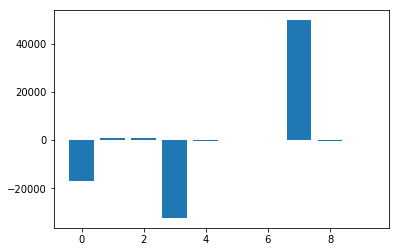

In [7]:
# PUTTING NULLS AS 0 (no reviews)
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
 

# define dataset
X = df[['pos_reviews','neg_reviews', 'Rvol/price', 'Rvol/%rec', 'Rvol/posR', 
        'Rvol/negR','price','no_reviews','recommendation_percent','summary_star_rating', 'TOTAL_SALES']]

X = X.dropna()
Y=X['TOTAL_SALES']
X = X.drop(['TOTAL_SALES'], axis=1)


Xs = StandardScaler().fit_transform(X)


# define the model
model = LinearRegression()
# fit the model
model.fit(Xs, Y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [ ]:
X.columns

**This shows that features are in order of importance: no_review, Rvol/%rec, pos_reviews.**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = df[['pos_reviews','neg_reviews', 'price/Rvol', 'Rvol/%rec', 'posR/Rvol', 
        'negR/Rvol','price','no_reviews','recommendation_percent','summary_star_rating','TOTAL_SALES','product_name']]

X=X.loc[X.no_reviews !=0]
sales=X['TOTAL_SALES']
names = X['product_name']

In [ ]:
X = X.drop(['TOTAL_SALES','product_name'], axis=1)
Xs = StandardScaler().fit_transform(X)
pC = pca.fit_transform(Xs)
df_pc = pd.DataFrame(data = pC, columns = ['c1','c2'])
df_pc.reset_index(drop=True, inplace=True)
sales.reset_index(drop=True, inplace=True)
names.reset_index(drop=True, inplace=True)
fdf = pd.concat([df_pc, sales,names], axis=1, ignore_index=True)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(fdf[:][0], fdf[:][1])

ax.grid()

In [ ]:
fdf.loc[fdf[:][0]>5]

In [ ]:
df.loc[(df.product_name=='hp slim 15.6in i5 8gb 256gb fhd laptop norton 360')]

In [ ]:
df.loc[(df.product_name.str.startswith('apple macbook pro touch 2019 16in i7 16gb 512g'))]